In [1]:
import os
import gzip
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
import datetime
import time
    

stringarchivo='Spring 2014  Huancayo'


def obtaindateliteral(yday,year):

    if(year<10):
        string=str(yday)+","+"0"+str(year)
    else:
        string=str(yday)+","+str(year)
    time_1 = time.strptime(string,"%j,%y")
  #time_string = time.strftime("%m/%d/%Y, %H:%M:%S", named_tuple)
    return (time_1.tm_year,time.strftime("%B",time_1),time_1.tm_mon)


    
def agregaarchivo(data_file,df_marks):
    
    # Delimiter
    data_file_delimiter ='\s+'
    
    # The max column count a line in the file could have
    largest_column_count = 0

    # Loop the data lines
    with open(data_file, 'r') as temp_f:
        # Read the lines
        lines = temp_f.readlines()

        for l in lines:
            # Count the column count for the current line
            column_count = len(l.split())+ 1

            # Set the new most column count
            largest_column_count = column_count if largest_column_count < column_count else largest_column_count

    # Close file
    temp_f.close()

    # Generate column names (will be 0, 1, 2, ..., largest_column_count - 1)
    column_names = [i for i in range(0, largest_column_count)]

    # Read csv
    df = pd.read_csv(data_file, header=None, delim_whitespace=True, names=column_names)
    # print(df)

    row=df.shape[0]
    column=df.shape[1]
    #print(row)
    #print(column)


    Satélite=0
    S4=0
    for y in range(0, df.shape[0]):
        if df[0][y]<2000:
            Año=df[0][y]
            Day=df[1][y]
            Tiempo=df[2][y]
            Nsats=df[3][y]
            for x in range(0,df.shape[1]):
                if (x-4)%4==0 and ((Nsats+1)*4)> x > 3:
                    #print("x:",x)
                    #print("Satélite:",df[x][y])
                    Satélite=df[x][y]

                if (x-5) % 4==0 and ((Nsats+1)*4)>x>4:
                    #print("S4:",df[x][y])
                    S4=df[x][y]

                if (x-6) % 4==0 and ((Nsats+1)*4)>x>5:
                    #print("Az:",df[x][y])
                    Az=df[x][y]

                if (x-7) % 4==0 and ((Nsats+1)*4)>x>6:
                    #print("Elv:",df[x][y])
                    Elv=df[x][y]



                    new_row = { 'Año':Año,'Day':Day,'Tiempo':Tiempo,'PRN':Satélite, 'S4':S4,'Az':Az,'Elv':Elv}
                    #append row to the dataframe
                    df_marks = df_marks.append(new_row, ignore_index=True)

    return df_marks

 

def devolverArchivos(carpeta):

    count=0

    for archivo in os.listdir(carpeta):

            count=count+1
            with gzip.open(os.path.join(carpeta,archivo), 'rb') as f_in:
                with open('/home/gfajardo/Desktop/Datos 121001/lji-'+stringarchivo+'.s4', 'wb') as f_out:
                    shutil.copyfileobj(f_in, f_out)
 

            # Input
            data_file='/home/gfajardo/Desktop/Datos 121001/lji-'+stringarchivo+'.s4'
        
            if (count<2):
                        #Creating a new dataframe
                df_marks = pd.DataFrame(columns=['Año','Day','Tiempo','PRN','S4','Az','Elv'])        
                listaF=agregaarchivo(data_file,df_marks)
                print(os.path.join(carpeta,archivo))
                print(count)
            else:
                listaF=agregaarchivo(data_file,listaF)
                print(os.path.join(carpeta,archivo))
                print(count)

            if os.path.isdir(os.path.join(carpeta,archivo)):
                devolverArchivos(os.path.join(carpeta,archivo)) #parte recursiva, es decir para leer todas las subcarpetas
    
    return(listaF)          

            
Mli=devolverArchivos("/home/gfajardo/Desktop/Datos 121001/gfajardo_H1kpTG/")
#devolverArchivos("/home/gfajardo/Desktop/Datos 121001/gfajardo_9sbmuc/")
print(Mli)
#devolverArchivos("/home/gfajardo/Desktop/Datos 121001/gfajardo_9sbmuc")
Mli.to_csv(r'/home/gfajardo/Desktop/Datos 121001/'+stringarchivo+'.csv')

/home/gfajardo/Desktop/Datos 121001/gfajardo_H1kpTG/lhyo_141004.s4.gz
1
/home/gfajardo/Desktop/Datos 121001/gfajardo_H1kpTG/lhyo_141114.s4.gz
2
/home/gfajardo/Desktop/Datos 121001/gfajardo_H1kpTG/lhyo_141016.s4.gz
3
/home/gfajardo/Desktop/Datos 121001/gfajardo_H1kpTG/lhyo_141201.s4.gz
4
/home/gfajardo/Desktop/Datos 121001/gfajardo_H1kpTG/lhyo_141209.s4.gz
5
/home/gfajardo/Desktop/Datos 121001/gfajardo_H1kpTG/lhyo_141103.s4.gz
6
/home/gfajardo/Desktop/Datos 121001/gfajardo_H1kpTG/lhyo_141108.s4.gz
7
/home/gfajardo/Desktop/Datos 121001/gfajardo_H1kpTG/lhyo_140924.s4.gz
8
/home/gfajardo/Desktop/Datos 121001/gfajardo_H1kpTG/lhyo_141028.s4.gz
9
/home/gfajardo/Desktop/Datos 121001/gfajardo_H1kpTG/lhyo_141125.s4.gz
10
/home/gfajardo/Desktop/Datos 121001/gfajardo_H1kpTG/lhyo_141112.s4.gz
11
/home/gfajardo/Desktop/Datos 121001/gfajardo_H1kpTG/lhyo_141130.s4.gz
12
/home/gfajardo/Desktop/Datos 121001/gfajardo_H1kpTG/lhyo_141220.s4.gz
13
/home/gfajardo/Desktop/Datos 121001/gfajardo_H1kpTG/lhyo_141

In [1]:
import os
import gzip
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
import datetime
import time
stringarchivo='Spring 2014  Huancayo'
data_file='/home/gfajardo/Desktop/Datos 121001/'+stringarchivo+'.csv'
column_names=['Año','Day','Tiempo','PRN','S4','Az','Elv']
Mli = pd.read_csv(data_file)#names=column_names)#, header=True)
Mli = Mli.drop(Mli.columns[[0]], axis=1)
Mli.describe()
#print(Mli)

Año           Day        Tiempo           PRN            S4  \
count  1204936.0  1.204936e+06  1.204936e+06  1.204936e+06  1.204936e+06   
mean        14.0  3.105277e+02  4.331539e+04  4.384402e+01  1.027630e-01   
std          0.0  2.837785e+01  2.413590e+04  4.956467e+01  8.842416e-02   
min         14.0  2.650000e+02  8.000000e+00  1.000000e+00  2.000000e-02   
25%         14.0  2.860000e+02  2.288700e+04  1.200000e+01  5.000000e-02   
50%         14.0  3.070000e+02  4.379600e+04  2.200000e+01  7.000000e-02   
75%         14.0  3.370000e+02  6.355700e+04  3.200000e+01  1.300000e-01   
max         14.0  3.560000e+02  8.631400e+04  1.380000e+02  1.850000e+00   

                 Az           Elv  
count  1.204936e+06  1.204936e+06  
mean   1.886786e+02  3.556009e+01  
std    1.005181e+02  1.735796e+01  
min    0.000000e+00  0.000000e+00  
25%    9.540000e+01  2.130000e+01  
50%    1.981000e+02  3.130000e+01  
75%    2.775000e+02  5.060000e+01  
max    3.600000e+02  8.900000e+01

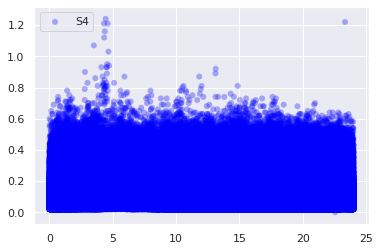

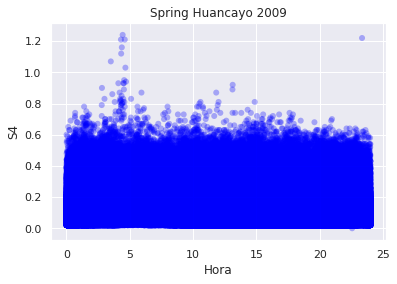

In [3]:
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt


N = 45

X = Mli['S4']
Y = Mli['Tiempo']/3600





fig, ax = plt.subplots()
ax.scatter(Y,X, c='blue', label='S4',alpha=0.3, edgecolors='none')
#ax.xlabel('Hora')
ax.legend()
ax.grid(True)

plt.show()


plt.scatter(Y,X, c='blue',alpha=0.3, edgecolors='none')
ax.legend()
ax.grid(True)
plt.title("Spring Huancayo 2009")
plt.xlabel("Hora")
plt.ylabel("S4")
plt.show()

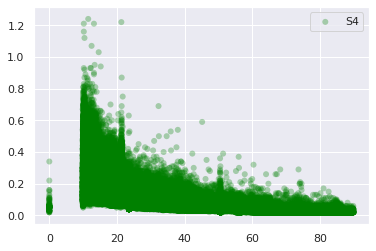

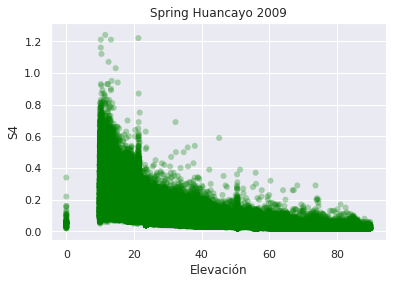

In [4]:
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt


N = 45

X = Mli['S4']
Y = Mli['Elv']





fig, ax = plt.subplots()
ax.scatter(Y,X, c='green', label='S4',alpha=0.3, edgecolors='none')
#ax.xlabel('Hora')
ax.legend()
ax.grid(True)

plt.show()


plt.scatter(Y,X, c='green',alpha=0.3, edgecolors='none')
ax.legend()
ax.grid(True)
plt.title("Spring Huancayo 2009")
plt.xlabel("Elevación")
plt.ylabel("S4")
plt.show()

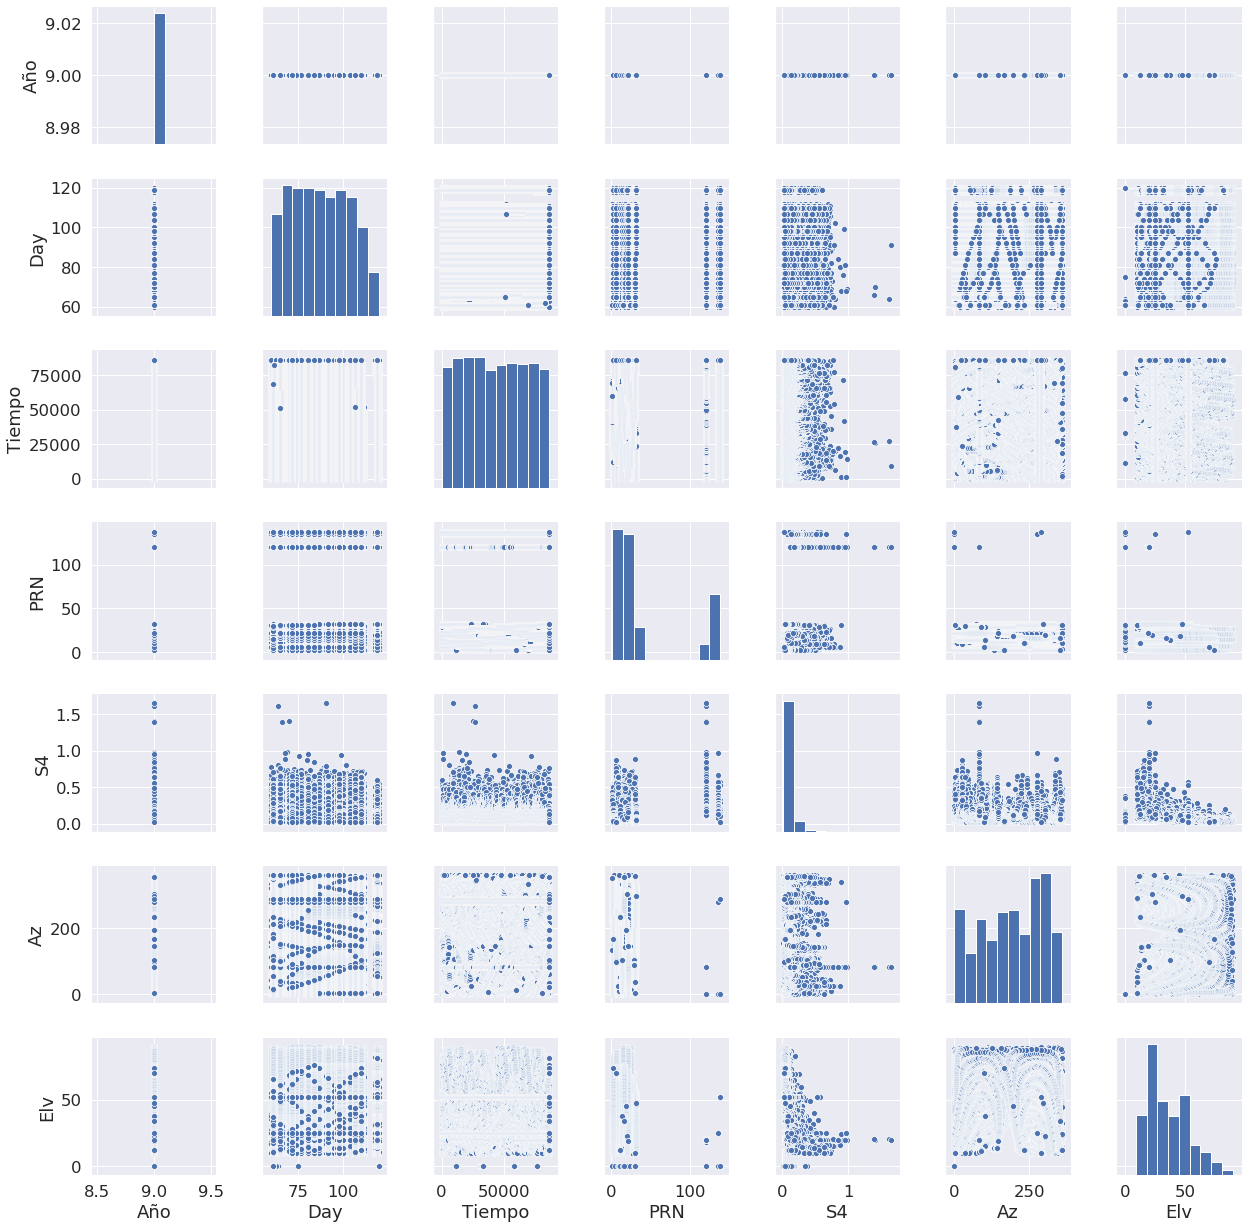

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)
sns.pairplot(Mli, hue=None, height=2.5);

In [28]:
corr = Mli.corr()
corr.style.background_gradient(cmap='RdBu_r')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps


In [12]:
Mli=Mli.loc[Mli['S4'] <10]
print(Mli)

         Año    Day   Tiempo    PRN    S4     Az   Elv
0        9.0  138.0  47297.0    2.0  0.07   92.3  31.1
1        9.0  138.0  47297.0    9.0  0.03  150.4  58.8
2        9.0  138.0  47297.0   12.0  0.06  194.9  36.7
3        9.0  138.0  47297.0   15.0  0.07    7.7  34.5
4        9.0  138.0  47297.0   24.0  0.15    0.9  21.4
5        9.0  138.0  47297.0   26.0  0.03  330.2  61.3
6        9.0  138.0  47297.0   27.0  0.03   96.7  54.0
7        9.0  138.0  47297.0   29.0  0.07  313.6  40.2
8        9.0  138.0  47297.0   30.0  0.09  231.4  27.6
9        9.0  138.0  47297.0  120.0  0.11   83.0  21.3
10       9.0  138.0  47297.0  135.0  0.11  277.5  23.5
11       9.0  138.0  47297.0  138.0  0.03  288.4  50.6
12       9.0  138.0  47357.0    2.0  0.05   92.8  31.1
13       9.0  138.0  47357.0    9.0  0.03  149.6  59.1
14       9.0  138.0  47357.0   12.0  0.05  194.4  36.7
15       9.0  138.0  47357.0   15.0  0.07    7.8  34.1
16       9.0  138.0  47357.0   24.0  0.15    1.2  21.7
17       9

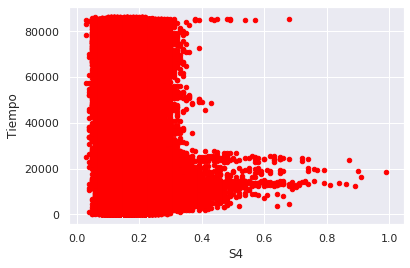

In [43]:
import pylab as pl
import numpy as np
a = Mli['S4']
b = Mli['Tiempo']*1.0


Mli.plot(kind='scatter',x ='S4',y='Tiempo',color='red')

plt.show()
#pl.scatter(X,Y)

[0.21 0.12 0.16 ... 0.31 0.1  0.12]
[[ 5. 16.]
 [12. 43.]
 [27. 35.]
 ...
 [28. 14.]
 [15. 39.]
 [17. 35.]]


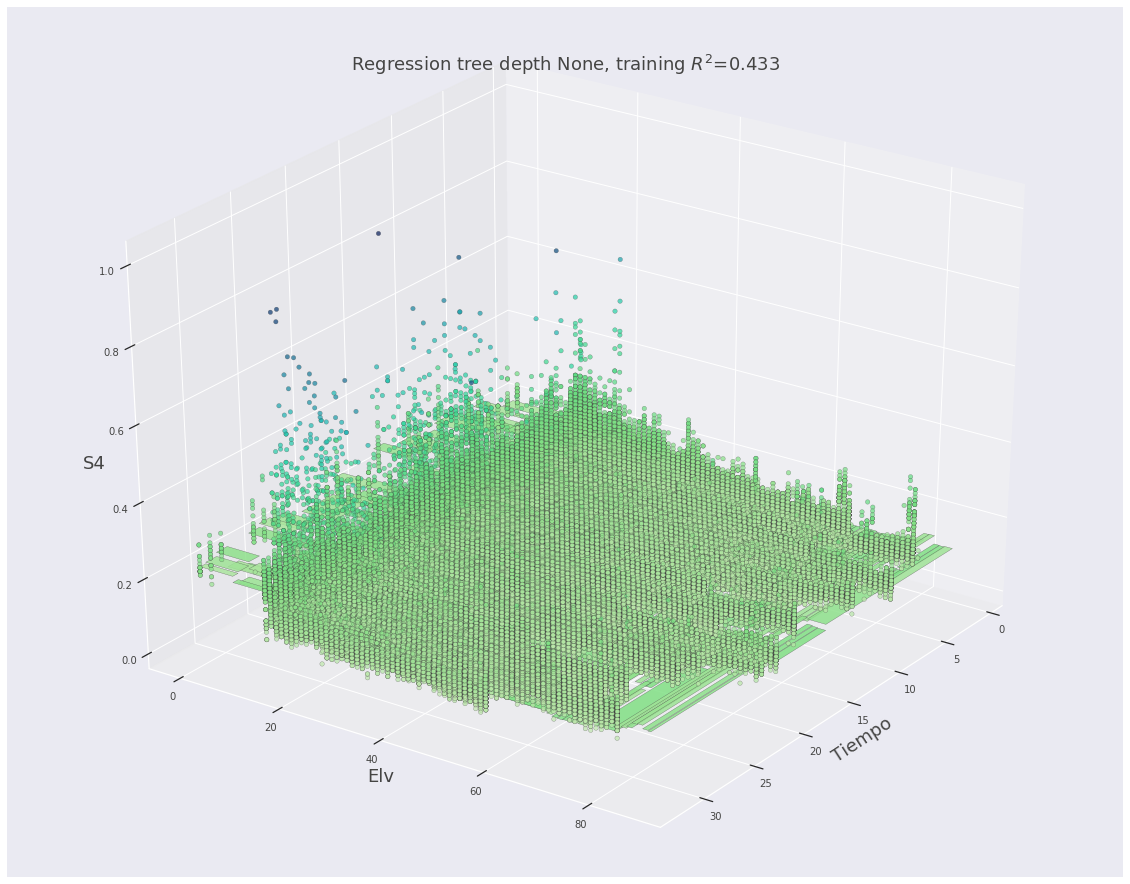

In [24]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *

from mpl_toolkits.mplot3d import Axes3D
from dtreeviz.trees import *





y = Mli['S4'].values

print(y)

features = [3,6]
X = Mli.values[:,features]
#X=ion['60S','Sig'].values
print(X)

figsize = (20,16)
fig = plt.figure(figsize=figsize)


ax = fig.add_subplot(111, projection='3d')

t = rtreeviz_bivar_3D(ax,
                      X, y,
                      max_depth=None,
                      feature_names=['Tiempo','Elv'],
                      target_name='S4',
                      fontsize=18,
                      elev=30,
                      azim=35,
                      dist=10,
                      show={'splits','title'})




            
plt.show()

In [21]:
M.to_csv(r'/home/gfajardo/Desktop/Datos 121001/gfajardo_ntVWPb/2012.csv')

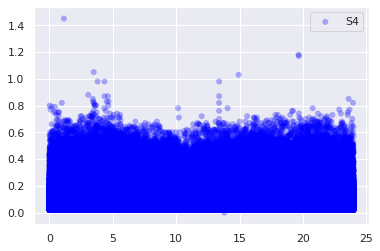

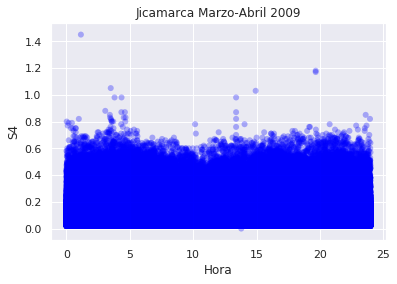

In [13]:
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt


N = 45

X = Mli['S4']
Y = Mli['Tiempo']/3600





fig, ax = plt.subplots()
ax.scatter(Y,X, c='blue', label='S4',alpha=0.3, edgecolors='none')
#ax.xlabel('Hora')
ax.legend()
ax.grid(True)

plt.show()


plt.scatter(Y,X, c='blue',alpha=0.3, edgecolors='none')
ax.legend()
ax.grid(True)
plt.title("Jicamarca Marzo-Abril 2009")
plt.xlabel("Hora")
plt.ylabel("S4")
plt.show()

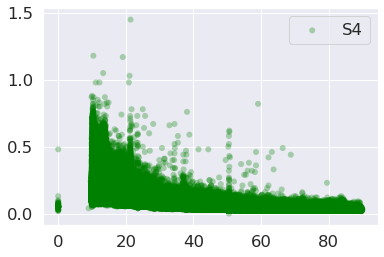

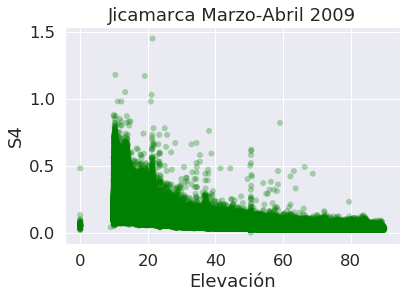

In [15]:
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt


N = 45

X = Mli['S4']
Y = Mli['Elv']





fig, ax = plt.subplots()
ax.scatter(Y,X, c='green', label='S4',alpha=0.3, edgecolors='none')
#ax.xlabel('Hora')
ax.legend()
ax.grid(True)

plt.show()


plt.scatter(Y,X, c='green',alpha=0.3, edgecolors='none')
ax.legend()
ax.grid(True)
plt.title("Jicamarca Marzo-Abril 2009")
plt.xlabel("Elevación")
plt.ylabel("S4")
plt.show()


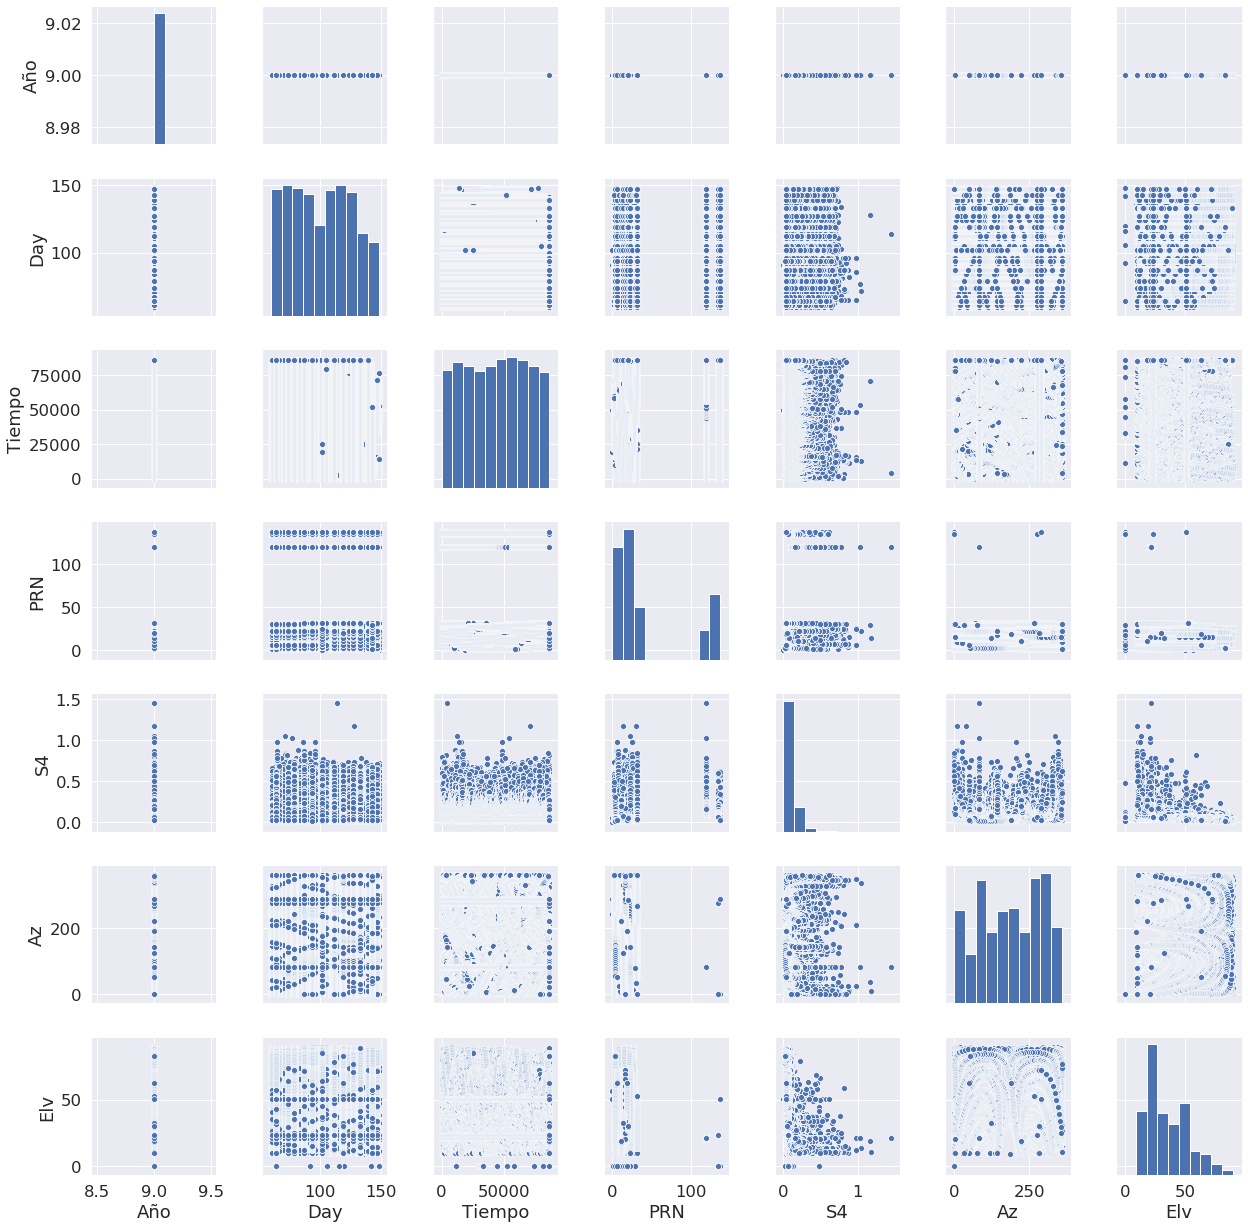

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)
sns.pairplot(Mli, hue=None, height=2.5);

In [33]:
corr = Mli.corr()
corr.style.background_gradient(cmap='RdBu_r')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

/home/gfajardo/anaconda3/lib/python3.7/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


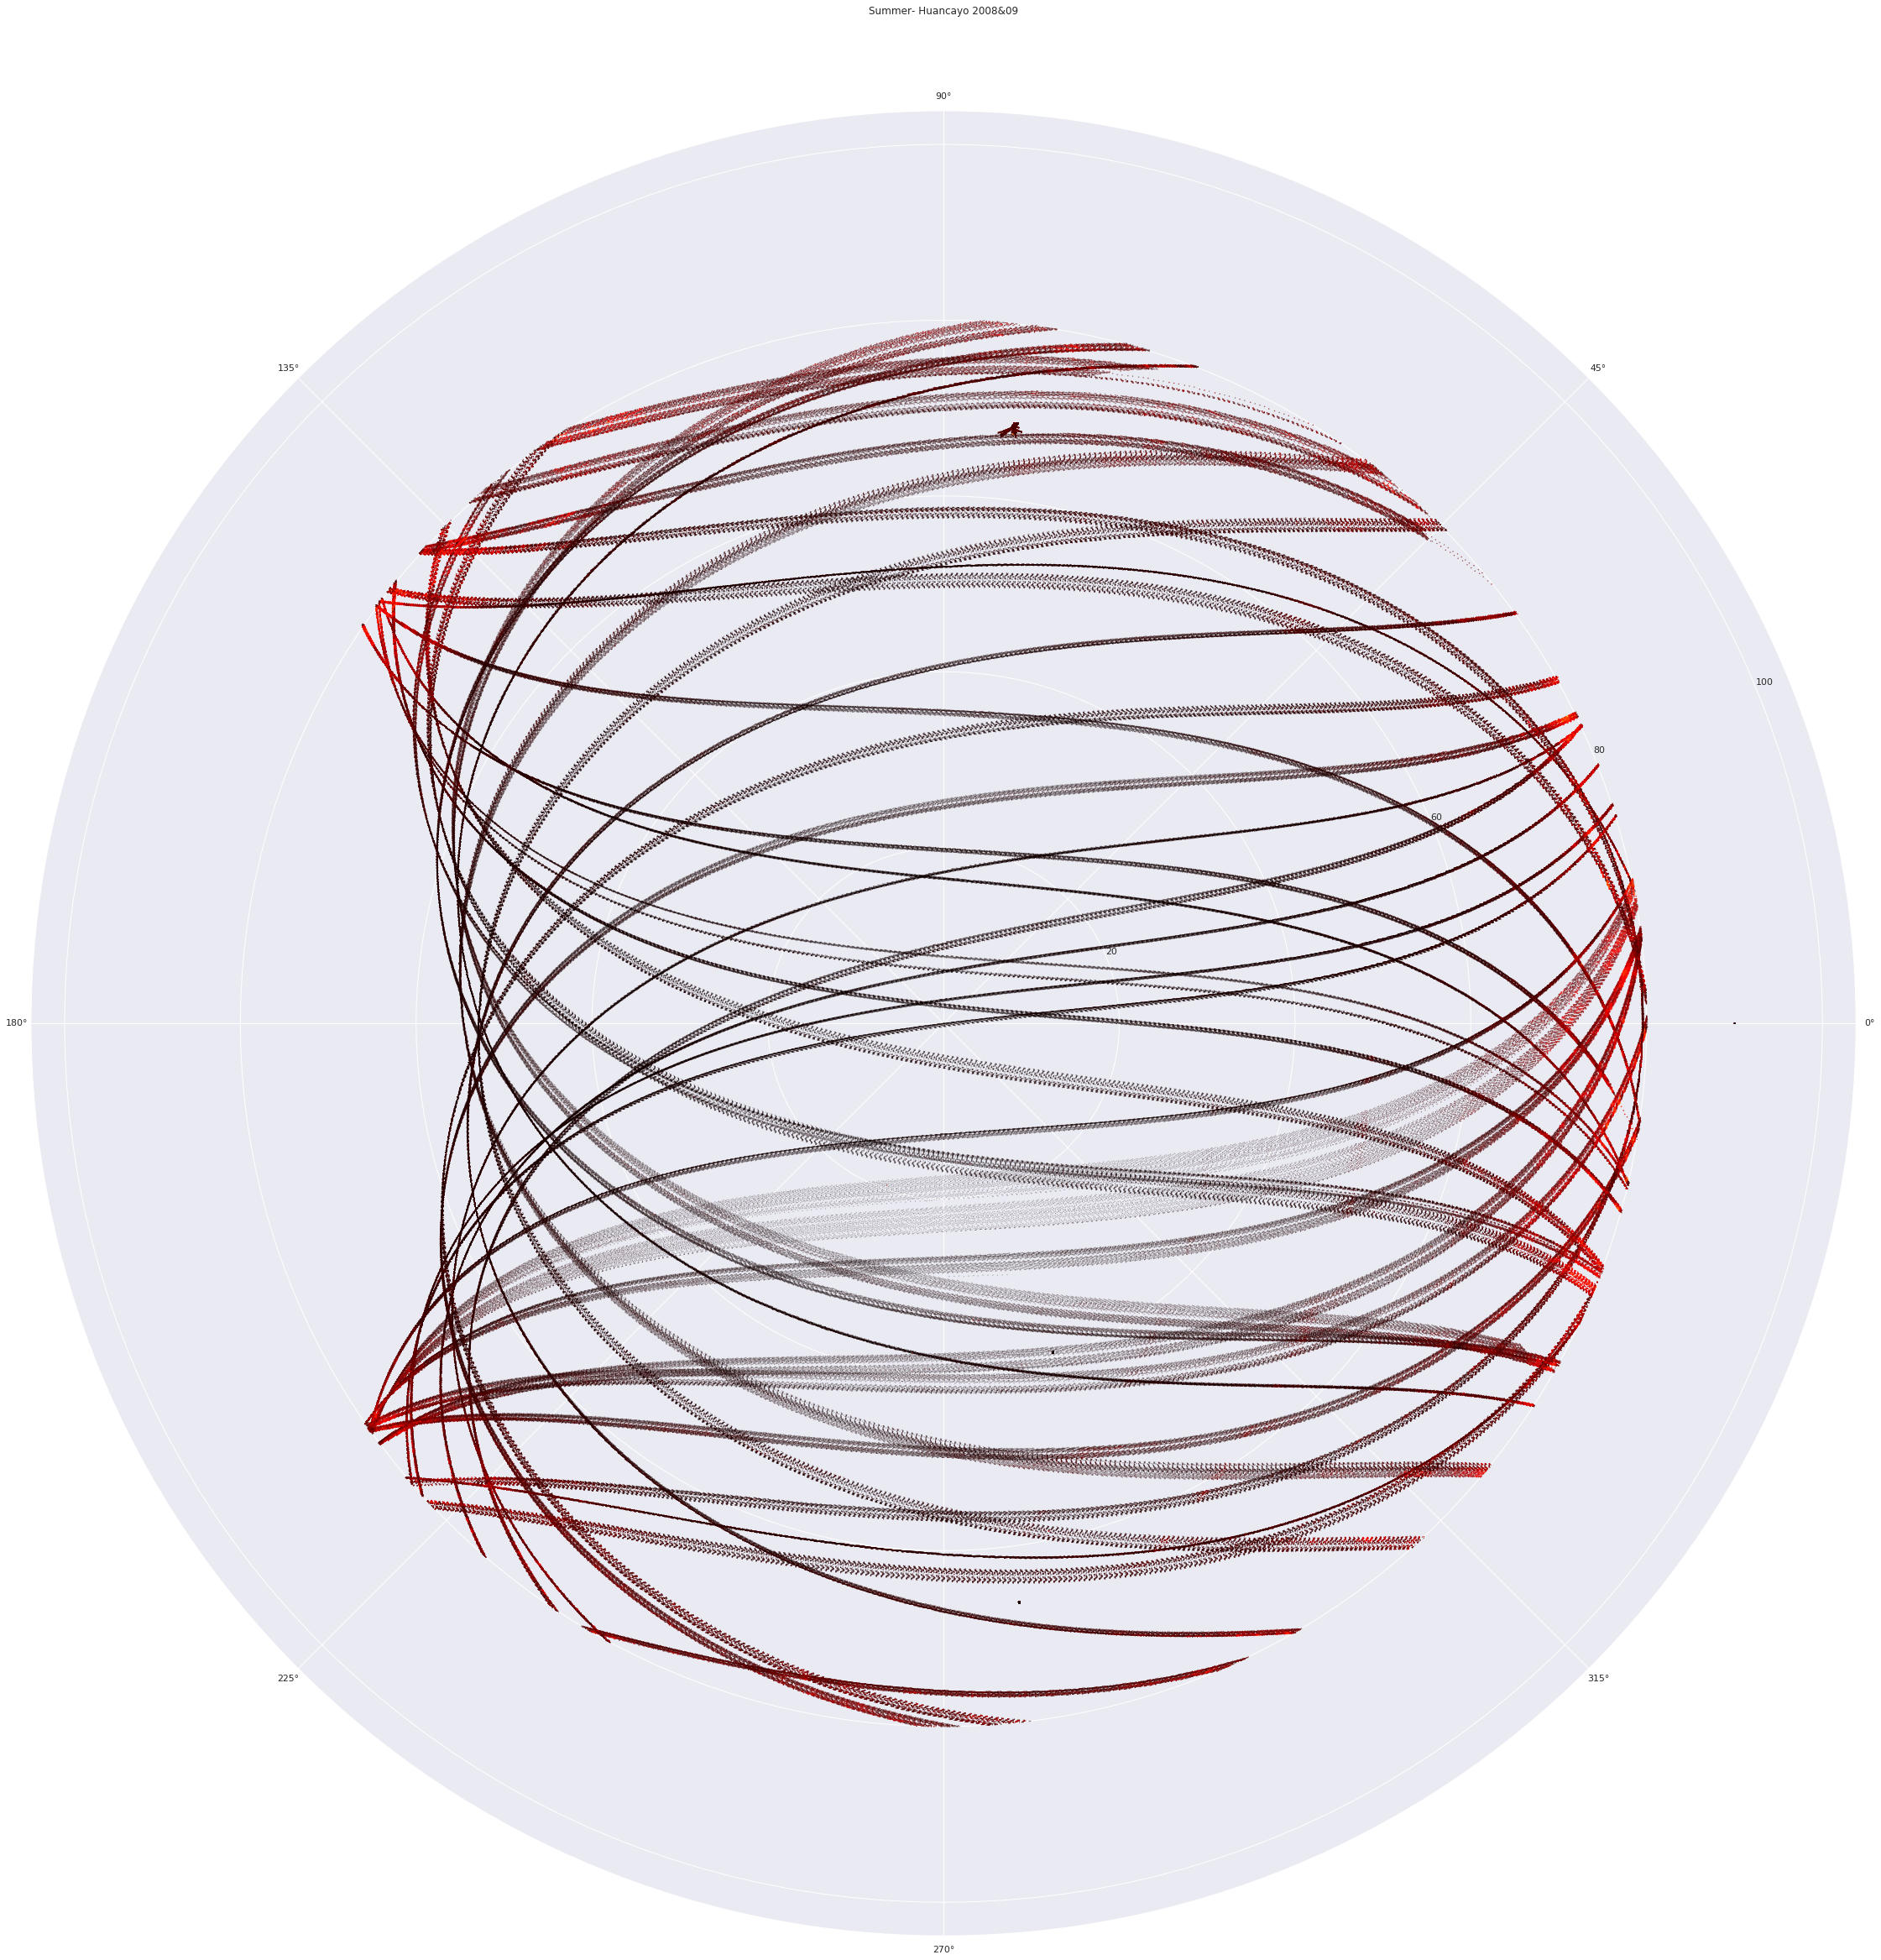

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors

r = [90-x for x in Mli['Elv']]
l = Mli['Az']
theta =  [x * np.pi/180 for x in l]
area = Mli['S4']
colors = Mli['S4']

fig=plt.figure(figsize=(40,40))
ax = fig.add_subplot(111, projection='polar')
plt.title("Summer- Huancayo 2008&09")
c = ax.scatter(theta, r, c=colors, s=area, cmap='hot', alpha=0.75)# alpha=0.75)